### What is this about
This is an exercise on building a classifier using the decision tree algorithm.
The data set is from https://www.kaggle.com/geomack/spotifyclassification

### Exploratory analysis

In [28]:
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import sklearn, matplotlib

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

In [2]:
# We can see that although most features are numeric, they are definately not normalized.
df = pd.read_csv('data.csv')
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [3]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [19]:
# I don't know what the Unnamed: 0 column stands for, so I'll remove it.
# The song_title and artist columns also won't be useful, so I'll keep them off my list of features as well.
features = [feature for feature in df.columns if feature not in ['Unnamed: 0', 'song_title', 'artist', 'target']]
target = ['target']
print(', '.join(features))

acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence


In [20]:
# Let's check for missing values
df.isna().describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
count,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017


In [21]:
# Let's check cardinality. Maybe some feature is categorical and already encoded
df.apply(pd.Series.nunique).sort_values()

target                 2
mode                   2
time_signature         4
key                   12
danceability         632
energy               719
speechiness          792
liveness             793
valence              853
instrumentalness    1107
artist              1343
acousticness        1394
loudness            1808
tempo               1919
duration_ms         1921
song_title          1956
Unnamed: 0          2017
dtype: int64

In [22]:
# mode, time_signature and key are categorical, but already encoded.
df.sample(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
88,88,0.0221,0.606,234987,0.668,0.000017,5,0.0527,-9.168,0,0.0729,158.859,4.0,0.958,1,Dadje Von O Von Non,Gnonnas Pédro
127,127,0.0134,0.405,592920,0.647,0.000076,5,0.8190,-6.109,0,0.0482,131.952,4.0,0.204,1,Pyramids,Frank Ocean


### Using logistic regression

In [23]:
train, test = train_test_split(df, test_size=0.2)

In [24]:
import statsmodels.formula.api as smf

formula = 'target ~ ' + ' + '.join(features)
formula

'target ~ acousticness + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + speechiness + tempo + time_signature + valence'

In [26]:
logreg = smf.logit(formula = formula, data = train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.619273
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1613
Model:                          Logit   Df Residuals:                     1599
Method:                           MLE   Df Model:                           13
Date:                Sun, 01 Mar 2020   Pseudo R-squ.:                  0.1064
Time:                        19:51:47   Log-Likelihood:                -998.89
converged:                       True   LL-Null:                       -1117.9
Covariance Type:            nonrobust   LLR p-value:                 1.984e-43
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.5741      1.126     -4.062      0.000      -6.781      -2.367
acousticness        -1.5636      0.299     -5.222      0.000      -2.151      -0.977
danceability         2.0606      0.414      4.977      0.000       1.249       2.872
duration_ms       2.565e-06    7.6e-07      3.374      0.001    1.07e-06    4.05e-06
energy               0.5593      0.493      1.134      0.257      -0.407       1.526
instrumentalness     1.3041      0.241      5.413      0.000       0.832       1.776
key                  0.0002      0.015      0.016      0.987      -0.029       0.030
liveness             0.7660      0.355      2.157      0.031       0.070       1.462
loudness            -0.1298      0.026     -4.941      0.000      -0.181      -0.078
mode                -0.1367      0.113     -1.206      0.228      -0.359       0.085
speechiness          3.4084      0.646      5.272      0.000       2.141       4.675
tempo                0.0032      0.002      1.539      0.124      -0.001       0.007
time_signature       0.0933      0.234      0.399      0.690      -0.365       0.552
valence              0.7360      0.265      2.782      0.005       0.217       1.255
====================================================================================
"""

In [35]:
# Evaluating on the test sample:

train_lr_pred = logreg.predict(train)
test_lr_pred = logreg.predict(test)

auc_train = roc_auc_score(train[target].values, train_lr_pred)
auc_test  = roc_auc_score(test[target].values, test_lr_pred)

logloss_train = log_loss(train[target].values, train_lr_pred)
logloss_test  = log_loss(test[target].values, test_lr_pred)

# Need binary output for this metric
# score_train = accuracy_score(train[target].values, train_lr_pred)
# score_test = accuracy_score(test[target].values, test_lr_pred)

print("Gradient Boosting metrics:")
print(f"Training      AUC: {auc_train}")
print(f"Training log loss: {logloss_train}\n")

print(f"Test      AUC: {auc_test}")
print(f"Test log loss: {logloss_test}")

Gradient Boosting metrics:
Training      AUC: 0.7205847980194062
Training log loss: 0.6192729155540478

Test      AUC: 0.6909616704244682
Test log loss: 0.6356933775395932


### Using decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Training a Decision Tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, criterion='entropy')
dt.fit(train[features].values, train[target].values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
# Evaluate metrics for this tree
train_pred = dt.predict_proba(train[features].values)[:,1]
test_pred  = dt.predict_proba(test[features].values)[:,1]

auc_train = roc_auc_score(train[target].values, train_pred)
auc_test  = roc_auc_score(test[target].values, test_pred)

logloss_train = log_loss(train[target].values, train_pred)
logloss_test  = log_loss(test[target].values, test_pred)

print(f"Training      AUC: {auc_train}")
print(f"Training log loss: {logloss_train}\n")

print(f"Test      AUC: {auc_test}")
print(f"Test log loss: {logloss_test}")

Training      AUC: 0.7801094862450216
Training log loss: 0.5505927683882096

Test      AUC: 0.7665915106362121
Test log loss: 0.5663853184946174


There's an improvement for the AUC metric, but log loss metrics got worse.

### Using gradient boosting

In [51]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=3, num_estimators=8)
xgb_model.fit(train[features].values, train[target].values)

/Users/douglas.navarro/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/douglas.navarro/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_estimators=8, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [53]:
# Evaluate metrics for the XGBoosting
train_xgbpred = xgb_model.predict_proba(train[features].values)[:,1]
test_xgbpred  = xgb_model.predict_proba(test[features].values)[:,1]

auc_train = roc_auc_score(train[target].values, train_xgbpred)
auc_test  = roc_auc_score(test[target].values, test_xgbpred)

logloss_train = log_loss(train[target].values, train_xgbpred)
logloss_test  = log_loss(test[target].values, test_xgbpred)

print("Gradient Boosting metrics:")
print(f"Training      AUC: {auc_train}")
print(f"Training log loss: {logloss_train}\n")

print(f"Test      AUC: {auc_test}")
print(f"Test log loss: {logloss_test}")

Gradient Boosting metrics:
Training      AUC: 0.9377689102120527
Training log loss: 0.36360960119789015

Test      AUC: 0.8398196255269091
Test log loss: 0.496194827619313


In [54]:
#  SHAP values
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb_model)

# Calculate Shap values
shap_values = explainer.shap_values(train[features])

/Users/douglas.navarro/miniconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


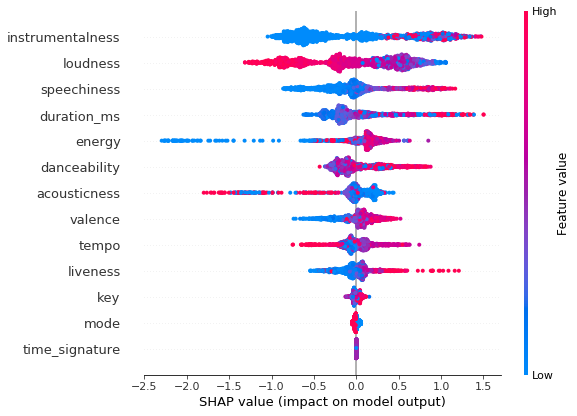

In [55]:
# summarize the effects of all the features
shap.summary_plot(shap_values, train[features])

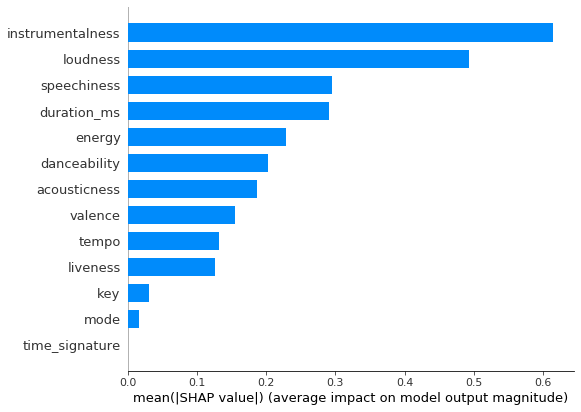

In [56]:
shap.summary_plot(shap_values, train[features], plot_type="bar")